<a href="https://colab.research.google.com/github/RioAccountant/04-Decision-Trees-Spotify-Prediction/blob/main/Copy_of_Spotify_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4, Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



The goals for the project are,

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The parameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project,

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https,//ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



#Dataset & Resources

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: Gw8JNcpJZhRE4bxeD9W2vwsDcYWwAWqT6Ow6dMtE8Mo9gFYgTyLg+jRvRtDOJ1jYvcte100uKJs=
x-amz-request-id: 913T3HMP9HHH5EF6
Date: Tue, 05 Nov 2024 17:24:40 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 738124



In [ ]:
#Import libraries thought to be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [ ]:
#assign variable to the dataset
spotify = pd.read_csv(url)

##Original Dataset View

In [ ]:
spotify.info()
#Starting Point
#(3) integer attributes and the remander are objects (20), but NONE are null for a total of 23 columns
#I think we can drop song ID, duraion, valence, and chord off the top and we will need to convert object to numerical type for meaningful value.
#no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
spotify.sample(10)
#instead of head or tail()-better view of what to expect
#how to set the seed/random state? Seed?

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
948,949,8,5,2020-07-24--2020-07-31,the last great american dynasty,"4,389,670",Taylor Swift,42227614,2Eeur20xVqfUoM3Q7EFPFt,"['pop', 'post-teen pop']",...,0.686,0.662,-8.505,0.0413,0.467,0.109,147.922,230999,0.706,G
1200,1201,67,1,2020-05-01--2020-05-08,Landed,"8,355,036",Drake,56327031,3KixNgUEaDtrKJVzdqjU5q,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.881,0.636,-4.629,0.287,0.00606,0.111,163.949,152195,0.715,G
548,549,182,6,2020-10-16--2020-10-23,Thinking out Loud,"4,995,623",Ed Sheeran,83337783,34gCuhDGsG4bRPIf9bb02f,"['pop', 'uk pop']",...,0.781,0.445,-6.061,0.0295,0.474,0.184,78.998,281560,0.591,D
567,568,138,49,2020-10-16--2020-10-23,Be Alright,"4,900,492",Dean Lewis,1692635,3EPXxR3ImUwfayaurPi3cm,"['australian pop', 'indie cafe pop', 'pop', 'p...",...,0.553,0.586,-6.319,0.0362,0.697,0.0813,126.684,196373,0.443,B
197,198,58,8,2021-06-04--2021-06-11,Late At Night,"4,954,899",Roddy Ricch,6603627,1fxYz1s15pyZLsJT0Hdh1m,"['melodic rap', 'rap', 'trap']",...,0.643,0.403,-11.254,0.41,0.343,0.138,98.54,174682,0.111,C#/Db
354,355,64,10,2021-04-02--2021-04-09,Headshot (feat. Polo G & Fivio Foreign),"5,174,298",Lil Tjay,3553442,4eNOLmx8r2IJAVKvBBL1jv,"['brooklyn drill', 'melodic rap', 'nyc rap']",...,0.808,0.639,-7.266,0.279,0.0802,0.15,118.0,144349,0.395,C#/Db
496,497,6,60,2020-03-13--2020-03-20,Say So,"5,103,528",Doja Cat,8671649,3Dv1eDb0MEgF93GpLXlucZ,"['dance pop', 'pop']",...,0.787,0.673,-4.583,0.159,0.264,0.0904,110.962,237893,0.779,B
506,507,64,2,2021-02-26--2021-03-05,AP - Music from the film Boogie,"5,462,333",Pop Smoke,6852509,17vGPZ5EsdvtgAOCD4FLWI,['brooklyn drill'],...,0.751,0.744,-6.859,0.177,0.152,0.252,148.014,171892,0.634,C#/Db
854,855,84,1,2020-10-02--2020-10-09,Outta Time (feat. Drake),"7,762,934",Bryson Tiller,5019909,4SCnCPOUOUXUmCX2uHb3r7,"['kentucky hip hop', 'pop', 'pop rap', 'r&b', ...",...,0.714,0.582,-7.272,0.0808,0.0129,0.0774,92.819,198822,0.338,F
1392,1393,129,3,2020-02-07--2020-02-14,"Lose Yourself - From ""8 Mile"" Soundtrack","5,118,004",Eminem,46814751,5Z01UMMf7V1o0MzF86s6WJ,"['detroit hip hop', 'hip hop', 'rap']",...,0.692,0.744,-4.565,0.257,0.00868,0.359,171.374,326467,0.0612,D


In [ ]:
#Attribute - note there are no parenthesis-returns tuple that represents dimensions
spotify.shape

(1556, 23)

In [ ]:
spotify.head(5).transpose()

,0,1,2,3,4
Index,1,2,3,4,5
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow)
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"


In [ ]:
#Let's drop the index as it it not necessary
spotify = spotify.drop(['Index'], axis=1, inplace=False)

#Key Attributes

##Genre(s)

In [ ]:
#And now get some metric of the initial numeric dt columns
spotify.describe()

,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000
mean,87.744216,10.668380
std,58.147225,16.360546
min,1.000000,1.000000
25%,37.000000,1.000000
50%,80.000000,4.000000
75%,137.000000,12.000000
max,200.000000,142.000000


In [ ]:
spotify['Genre'].unique()
#oh my; this is a problem-will need to drop or split this for our mvp & save splitting for next round

array(["['indie rock italiano', 'italian pop']", "['australian hip hop']",
       "['pop']", "['pop', 'uk pop']", "['lgbtq+ hip hop', 'pop rap']",
       "['dance pop', 'pop']", "['puerto rican pop', 'trap latino']",
       "['latin', 'reggaeton', 'trap latino']",
       "['dance pop', 'pop', 'uk pop']",
       "['latin', 'reggaeton', 'reggaeton colombiano']",
       "['k-pop', 'k-pop boy group']",
       "['canadian pop', 'pop', 'post-teen pop']",
       "['canadian contemporary r&b', 'canadian pop', 'pop']",
       "['reggaeton', 'trap latino']",
       "['gauze pop', 'indietronica', 'shiver pop']",
       "['latin', 'latin hip hop', 'reggaeton', 'trap latino']",
       "['dfw rap', 'melodic rap', 'rap']",
       "['dance pop', 'house', 'pop dance', 'tropical house', 'uk dance']",
       "['dance pop', 'pop', 'post-teen pop']",
       "['dance pop', 'electropop', 'pop', 'post-teen pop']",
       "['colombian pop', 'latin', 'reggaeton', 'reggaeton colombiano']",
       "['pop', 'post-

In [ ]:
spotify = spotify.drop(['Genre',], axis=1, inplace=False)

##Popularity - a given but not necessarily the 'target'

In [ ]:
spotify.Popularity.unique()
#another view of the range, note the na or blank and 70 unique= (11*6)+4

array(['100', '99', '98', '96', '97', '94', '95', '89', '93', '90', '91',
       '92', '85', '88', ' ', '86', '84', '49', '83', '87', '0', '80',
       '78', '2', '79', '82', '72', '77', '67', '74', '81', '75', '71',
       '57', '56', '55', '54', '53', '76', '73', '70', '69', '66', '65',
       '64', '63', '68', '1', '61', '58', '59', '50', '51', '48', '47',
       '42', '45', '43', '46', '44', '41', '38', '36', '60', '29', '52',
       '62', '34', '15', '3'], dtype=object)

In [ ]:
#what are are ranges? In descending order
spotify["Popularity"].value_counts()
#looks like scores in range of 72-80 are 20% of the population - 'Top Twenty'

,count
Popularity,
75,67
76,66
72,64
77,62
80,58
...,...
38,1
46,1
97,1


In [ ]:
#Confirmation in % output
spotify["Popularity"].value_counts(normalize=True)

,proportion
Popularity,
75,0.043059
76,0.042416
72,0.041131
77,0.039846
80,0.037275
...,...
38,0.000643
46,0.000643
97,0.000643


##Times Charted Attributes - another possible target

In [ ]:
#It only needs to chart 1x to be a hit
#could this be used instead of popularity? It is a measure of frequency.
spotify["Number of Times Charted"].value_counts(20)

,proportion
Number of Times Charted,
1,0.327121
2,0.095758
3,0.070694
4,0.049486
5,0.045630
...,...
74,0.000643
47,0.000643
77,0.000643


In [ ]:
unique_charted = spotify["Number of Times Charted"].unique()
unique_charted
#n=62

array([  8,   3,  11,   5,   1,  18,  16,  10,  43,   9,  19,  17,  14,
         7,  29,  31,  83,  23,  28,  21,  15,  39,  13,   6,  49,  51,
         4,  12,  26,  34,  24,  48,   2,  55,  20,  25,  40,  84,  80,
        35,  67,  53,  37,  30,  42,  52,  81,  32,  47,  56,  22,  27,
        44,  82,  76,  78,  41,  65,  71,  33,  36,  77,  45,  74,  70,
        68, 142,  72,  69,  60,  66,  38,  46,  61,  57])

In [ ]:
sorted_unique_charted = np.sort(unique_charted)
sorted_unique_charted

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,  53,
        55,  56,  57,  60,  61,  65,  66,  67,  68,  69,  70,  71,  72,
        74,  76,  77,  78,  80,  81,  82,  83,  84, 142])

In [ ]:
#what are are ranges? In descending order
#Very few make it to #1; just over 1%
spotify["Highest Charting Position"].value_counts(normalize=True)

,proportion
Highest Charting Position,
1,0.011568
2,0.011568
5,0.010925
15,0.009640
22,0.009640
...,...
98,0.001285
173,0.001285
165,0.001285


##EDA Use to view other column contents

In [ ]:
#Use to test other columns content frequency
unique_charted = spotify["Chord"].unique()
unique_charted

array(['B', 'C#/Db', 'A', 'D#/Eb', 'G#/Ab', 'F#/Gb', 'C', 'D', 'A#/Bb',
       'G', 'E', 'F', ' '], dtype=object)

In [ ]:
spotify[["Chord", "Artist Followers","Popularity", ]].value_counts()

Chord  Artist Followers  Popularity
                                       11
B      1250353           0              4
F#/Gb  1251372           0              3
C#/Db  1250353           0              3
       36177712          70             3
                                       ..
       10710088          60             1
       10606572          41             1
       10580764          70             1
       10491105          67             1
G#/Ab  9987114           82             1
Name: count, Length: 1471, dtype: int64

In [ ]:
#what are are ranges? In descending order
spotify["Chord"].value_counts(normalize=True)

,proportion
Chord,
C#/Db,0.137532
C,0.099614
B,0.090617
G,0.087404
F,0.084190
G#/Ab,0.083548
D,0.080334
A#/Bb,0.078406
F#/Gb,0.077763


##Drop attributes thought to be related to a "new song" success

In [ ]:
spotify2 = spotify.drop(['Duration (ms)', 'Weeks Charted', 'Song Name', 'Song ID', 'Release Date','Week of Highest Charting', 'Speechiness', 'Artist', 'Chord'], axis=1, inplace=False)

In [ ]:
#down to 13 columns; how many to convert?
spotify2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Streams                    1556 non-null   object
 3   Artist Followers           1556 non-null   object
 4   Popularity                 1556 non-null   object
 5   Danceability               1556 non-null   object
 6   Energy                     1556 non-null   object
 7   Loudness                   1556 non-null   object
 8   Acousticness               1556 non-null   object
 9   Liveness                   1556 non-null   object
 10  Tempo                      1556 non-null   object
 11  Valence                    1556 non-null   object
dtypes: int64(2), object(10)
memory usage: 146.0+ KB


#Convert remaining objects

In [ ]:
spotify2.Streams = spotify2.Streams.str.replace(',', '').astype("int64")

In [ ]:
spotify2['Artist Followers'] = spotify2['Artist Followers'].str.replace(',', '').str.strip().replace('', '0').astype("int64")

In [ ]:
spotify2['Popularity'] = spotify2['Popularity'].str.replace(',', '').str.strip().replace('', '0').astype("int64")

In [ ]:
spotify2['Danceability'] = spotify2['Danceability'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Energy'] = spotify2['Energy'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Loudness'] = spotify2['Loudness'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Acousticness'] = spotify2['Acousticness'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Liveness'] = spotify2['Liveness'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Tempo'] = spotify2['Tempo'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
spotify2['Valence'] = spotify2['Valence'].str.replace(',', '').str.strip().replace('', '0').astype("float64")

In [ ]:
#spotify2['Chord'] = spotify2['Chord'].astype(str).str.replace(',', '').str.replace('#', '').str.replace('/', '').str.strip().str.replace('', '0').str.replace('', '/').astype("category")

In [ ]:
spotify2.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,int64
Artist Followers,int64
Popularity,int64
Danceability,float64
Energy,float64
Loudness,float64
Acousticness,float64
Liveness,float64


In [ ]:
#Check for nulls that might disrupt model
spotify2.isnull().sum()*100

,0
Highest Charting Position,0
Number of Times Charted,0
Streams,0
Artist Followers,0
Popularity,0
Danceability,0
Energy,0
Loudness,0
Acousticness,0
Liveness,0


#Decision Tree Regression

In [ ]:
X = spotify2.drop('Popularity', axis=1)
y = spotify2['Popularity']

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rms_error.mean().round(2)}")#remove * 1K


RMSE: 14.29


In [ ]:
numLoops = 500
#Removed * 1K
mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE, {np.sqrt(mean_error).mean()}')
print(f'RMSE_std, {np.sqrt(mean_error).std()}')


RMSE, 10.219268250876942
RMSE_std, 1.440730996069499


In [ ]:
#Tree depth
max_depths = [1,2,3,4,5,6,7,8,9,10] #number of questions
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,16.020141,1.229540
1,2,15.354849,1.347187
2,3,14.039796,2.102425
3,4,10.920128,1.499452
4,5,10.226056,1.457999
5,6,10.054234,1.343136
6,7,10.108519,1.283032
7,8,10.315355,1.210153
8,9,10.448662,1.383580
9,10,10.696566,1.261969


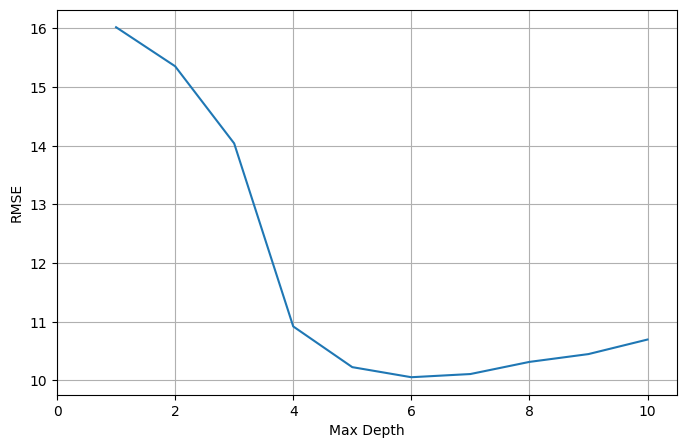

In [ ]:
# Plot result-sweet spot seems to be about 4
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()

In [ ]:
# Re run with max depth = 4
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=4 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)*1}")

CV RMSE: 10.74


Visualization of Tree

In [ ]:
import graphviz #the tool to display
from IPython.display import display
from sklearn import tree

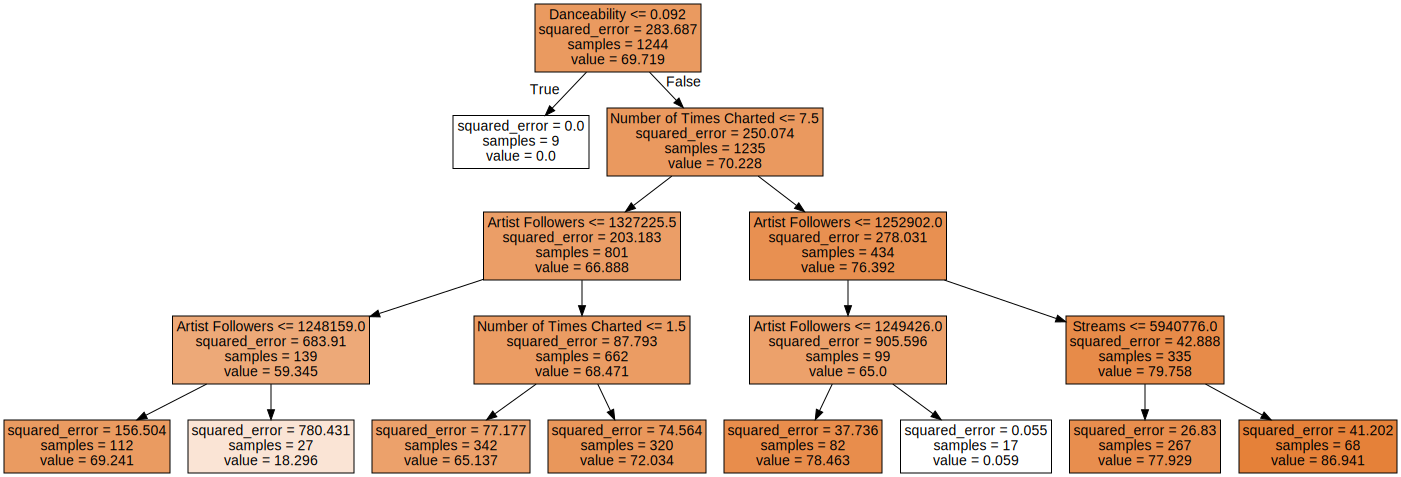

In [ ]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)

In [ ]:
# Option 2
#plt.figure(figsize=(30,15))
#tree_plot = tree.plot_tree(
 # model,
  #feature_names = X.columns,
  #filled=True,
#)

Random Forest

In [ ]:
# two parameters - n_estimators (Chord), max_depth (Popularity)
numLoops = 500

mean_error = np.zeros(numLoops)

np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 2 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs/the only line of code that changes...DO NOT HAVE TO SCALE VAR
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1}')
np.sqrt(mean_error)[:50]

RMSE: 11.324970875601263
RMSE_std: 1.5901109822946136


array([10.48224231, 10.80312603, 12.698362  ,  9.45582679, 10.25125071,
       10.49816834, 10.78895001,  9.56401341, 11.42159027, 12.99019601,
        9.76958093,  9.04157066,  9.20819556, 11.51938862,  9.59166305,
       13.38732059, 12.6035137 , 11.94760195, 10.2530874 , 10.47034885,
       11.48891606, 12.08563197, 14.83101934, 12.77445493, 10.46158265,
       12.22865749,  9.30742742, 12.63751284,  9.44565257,  9.51706463,
       12.41083584, 11.49275134, 10.9908543 , 13.20817661, 10.98454625,
       10.84857163, 16.12036556, 11.75102287, 10.1459699 , 12.9545866 ,
       10.84140478,  9.54988589, 10.09938593, 11.8988795 , 15.34621811,
       10.39989676,  9.17655353,  9.04941031,  9.33154459, 13.26468707])

##Tree Selection

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))

##Plot Result

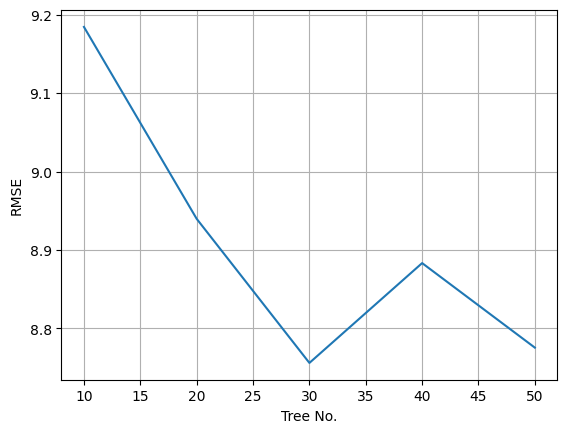

In [ ]:
#Model result
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

In [ ]:
pd.DataFrame( zip( rmse_results, std_results, ) )

,0,1
0,9.184515,0.915759
1,8.939780,0.848403
2,8.756008,0.880231
3,8.883319,0.926340
4,8.775493,0.823424


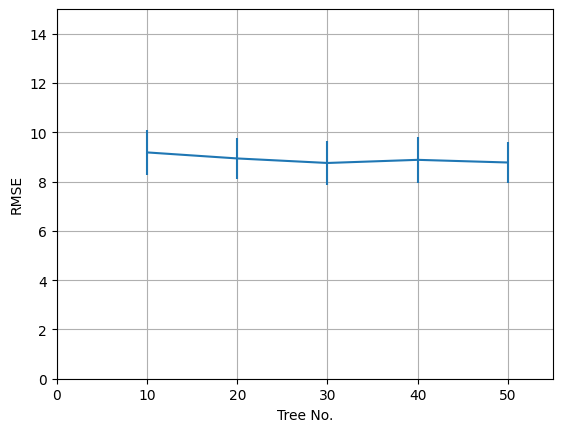

In [ ]:
# plt.errorbar(num_trees, rmse_results, yerr=(std_results*2,std_results*2))
plt.errorbar(num_trees, rmse_results, yerr=std_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.ylim(0,15)
plt.xlim(0,55)
plt.grid()

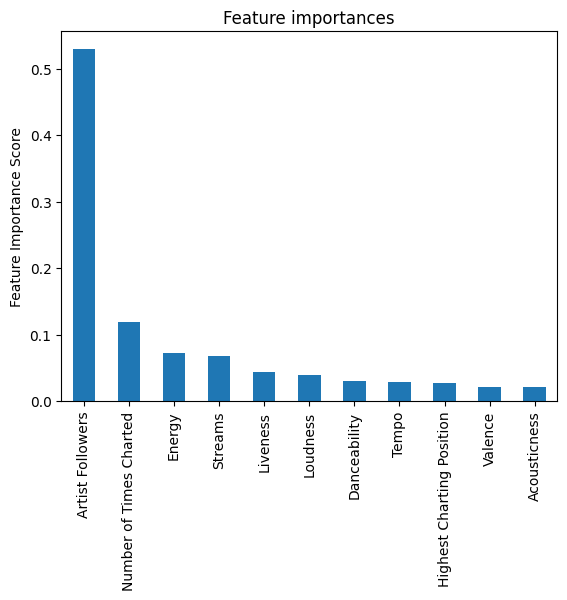

In [ ]:
##Find Important Predictors
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;
#these must add up to 1 and the strength is 53%

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()#cumsum is the running total for the list in numpy

,0
Artist Followers,52.929146
Number of Times Charted,64.792487
Energy,71.997733
Streams,78.761021
Liveness,83.142526
Loudness,87.127492
Danceability,90.144333
Tempo,92.995564
Highest Charting Position,95.720035
Valence,97.881303
